In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
import pandas as pd
from matplotlib import gridspec

# ESR

## Dados coletados

In [2]:
f = np.array([50.001,52.501, 55.000, 57.500, 60.001, 62.504, 65.002, 67.500, 70.001, 72.447])*1e6 #Hz

sigma_f = np.full(len(f), 0.001*1e6)

delta_V = np.array([4.9, 5.2, 5.4, 5.6, 5.9, 6.1, 6.4, 6.7, 6.9, 7.1])/10

sigma_dV = np.array([0.1, 0.2, 0.2, 0.2, 0.1, 0.1, 0.2, 0.1, 0.1, 0.1])/10


## O campo magnético e sua incerteza

Nós sabemos que:

$$B_R = 3.67 U_R \ (mT)$$

Propagando o erro de $U_r$:

$$\sigma_{B_R} = \sqrt{\left(\frac{\partial B_R}{\partial U_R}\right)^2\sigma_{U_R}^2}$$

$$\sigma_{B_R} = \sqrt{\left(3.67\right)^2\sigma_{U_R}^2}$$

$$\sigma_{B_R} = 3.67\sigma_{U_R} \ (mT)$$

In [3]:
b_r = 3.67*delta_V*1e-3 #T

sigma_b_r = 3.67*sigma_dV*1e-3 #T

## Dados brutos

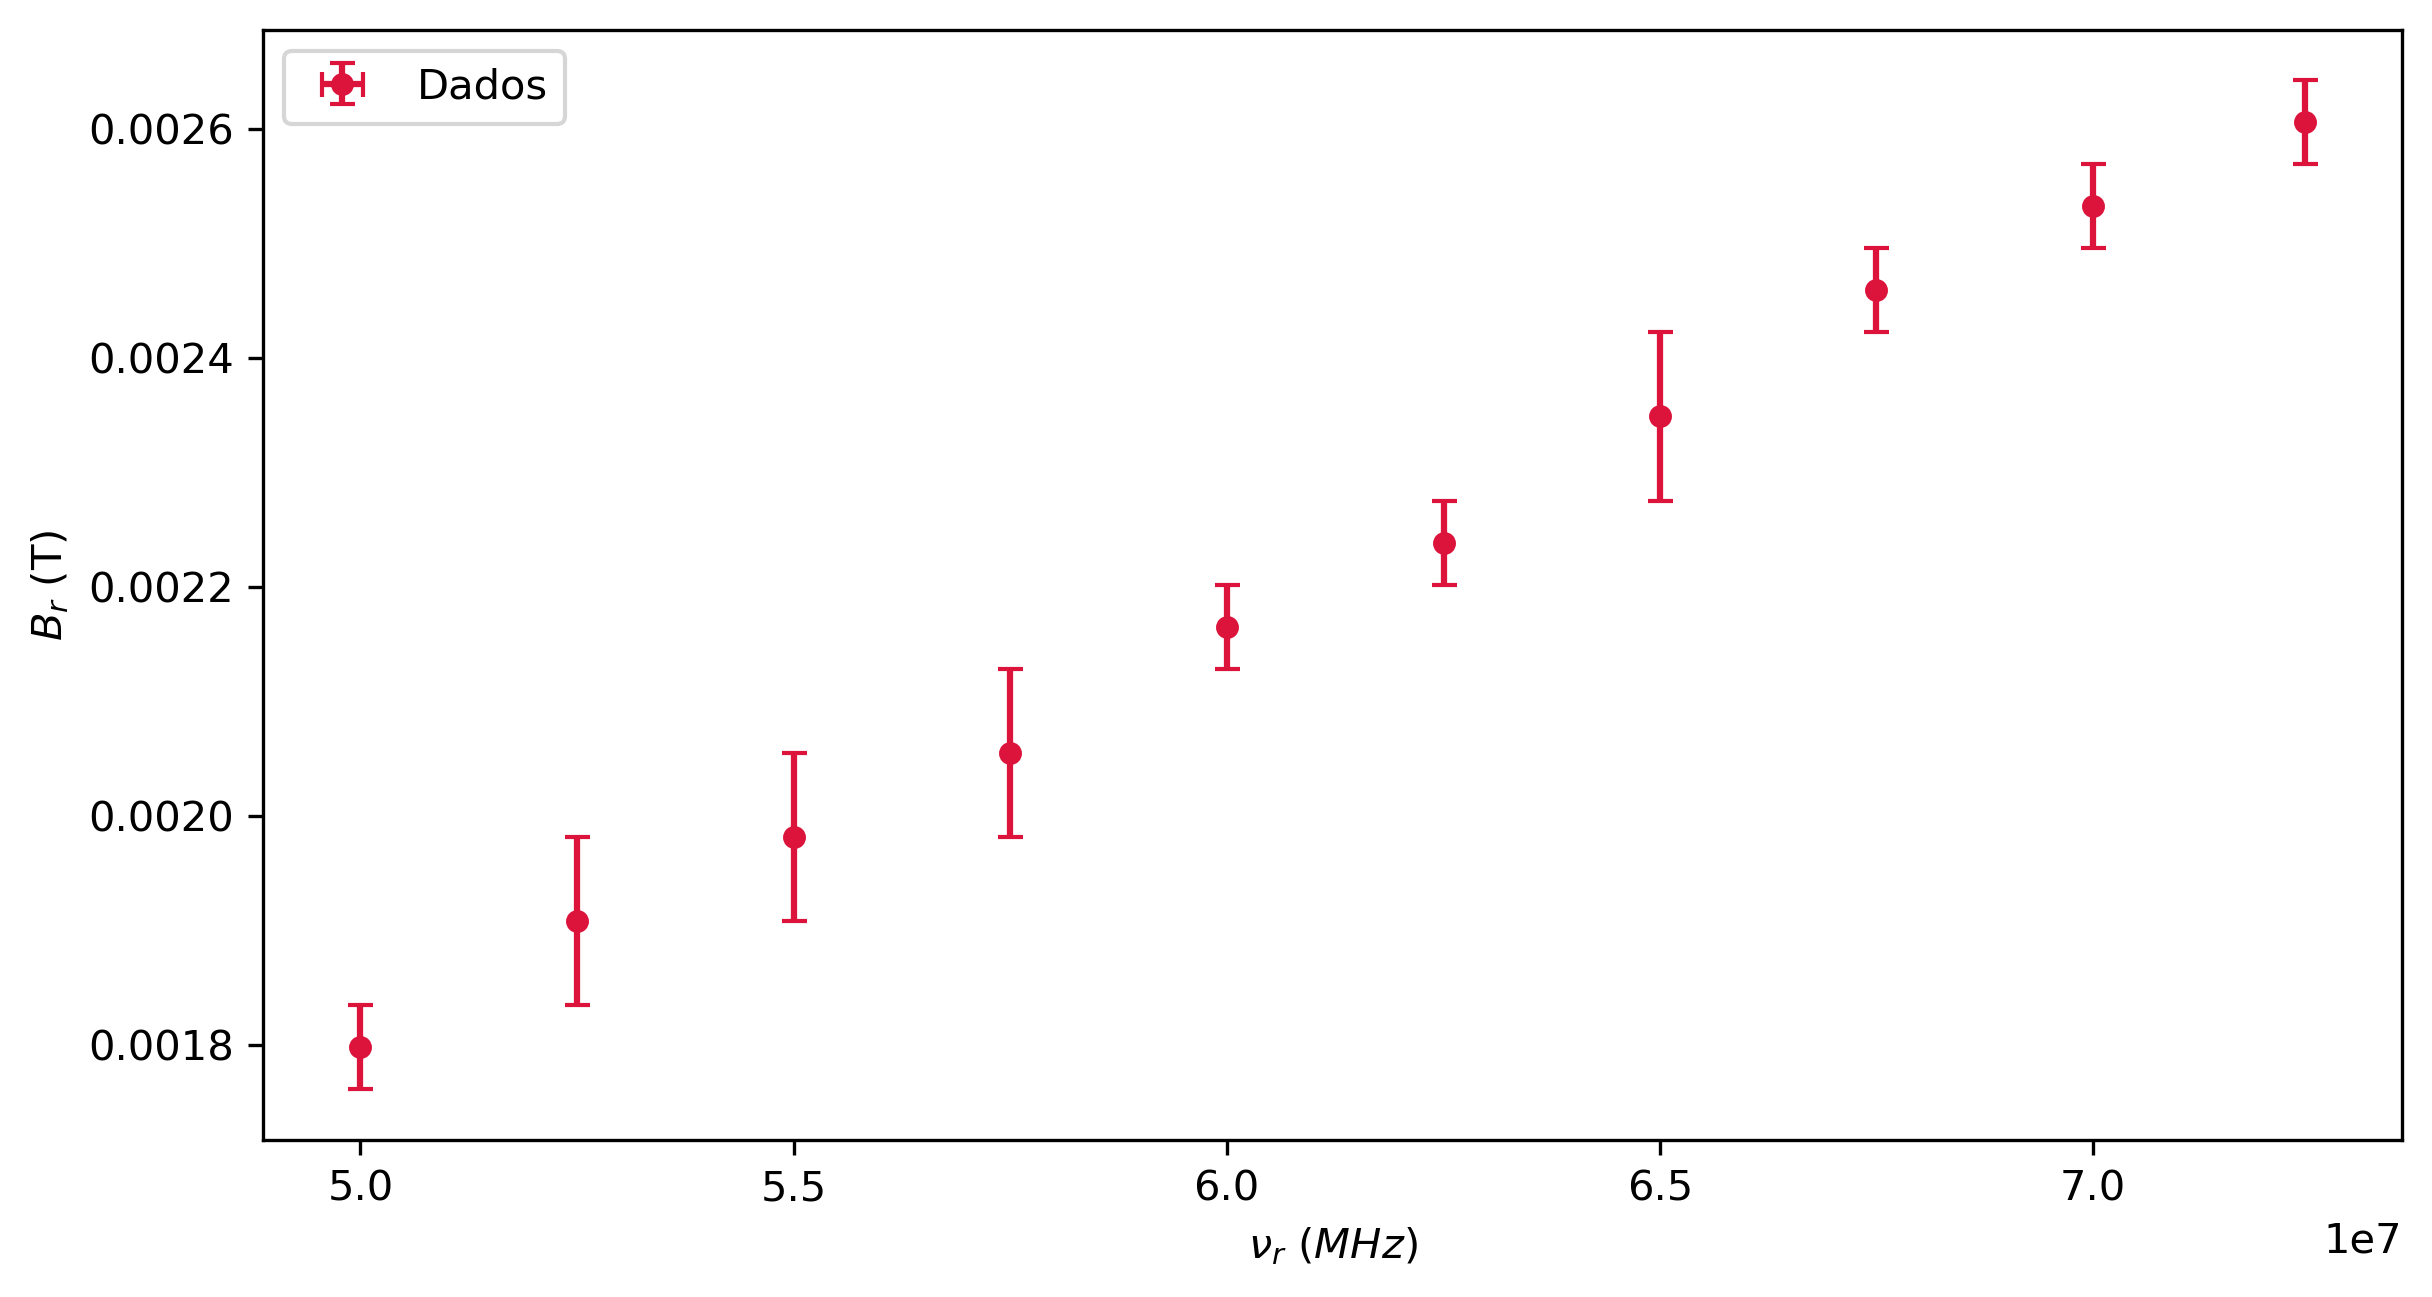

In [4]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(f,b_r,sigma_b_r,sigma_f, 'o', ms = 4.5, capsize=3, color = 'crimson', label = 'Dados')
plt.xlabel(r'$\nu_r$ ($MHz$)')
plt.ylabel(r'$B_r$ (T)')
plt.title('')
plt.legend()
#plt.savefig('Graphs/ChargeMass/Dadosbrutos.pdf', dpi = 300)
plt.show()

## Ajuste linear

In [10]:
fitpars, cov_pars = np.polyfit(f,b_r,1,w=np.power(sigma_b_r,-1),cov='True')
#print(fitpars, cov_pars)

coef_angular = fitpars[0]
coef_linear = fitpars[1]
sigma_angular = np.sqrt(cov_pars[0][0])
sigma_linear = np.sqrt(cov_pars[1][1])

sigma_angular = float('{:g}'.format(float('{:.1g}'.format(sigma_angular))))
sigma_linear = float('{:g}'.format(float('{:.1g}'.format(sigma_linear))))

                     
print('Coeficiente angular: %.3f +- %.3f (nT/Hz)' % (coef_angular*1e9 ,sigma_angular*1e9))
print('Coeficiente linear: %.2f +- %.2f (10^{-3} T)' %(coef_linear*1e3,sigma_linear*1e3))

Coeficiente angular: 0.036 +- 0.001 (nT/Hz)
Coeficiente linear: -0.02 +- 0.04 (10^{-3} T)


## Gráfico do ajuste linear

In [6]:
#Calulando chi^2_red
yhat = np.polyval(fitpars, f)
chi_squared = np.sum(((yhat - b_r)/sigma_b_r) ** 2)
chi2_red = chi_squared/(len(b_r)-2)

#Imprimindo o resultado
print("chi^2_red = %.3f" % chi2_red)

chi^2_red = 0.098


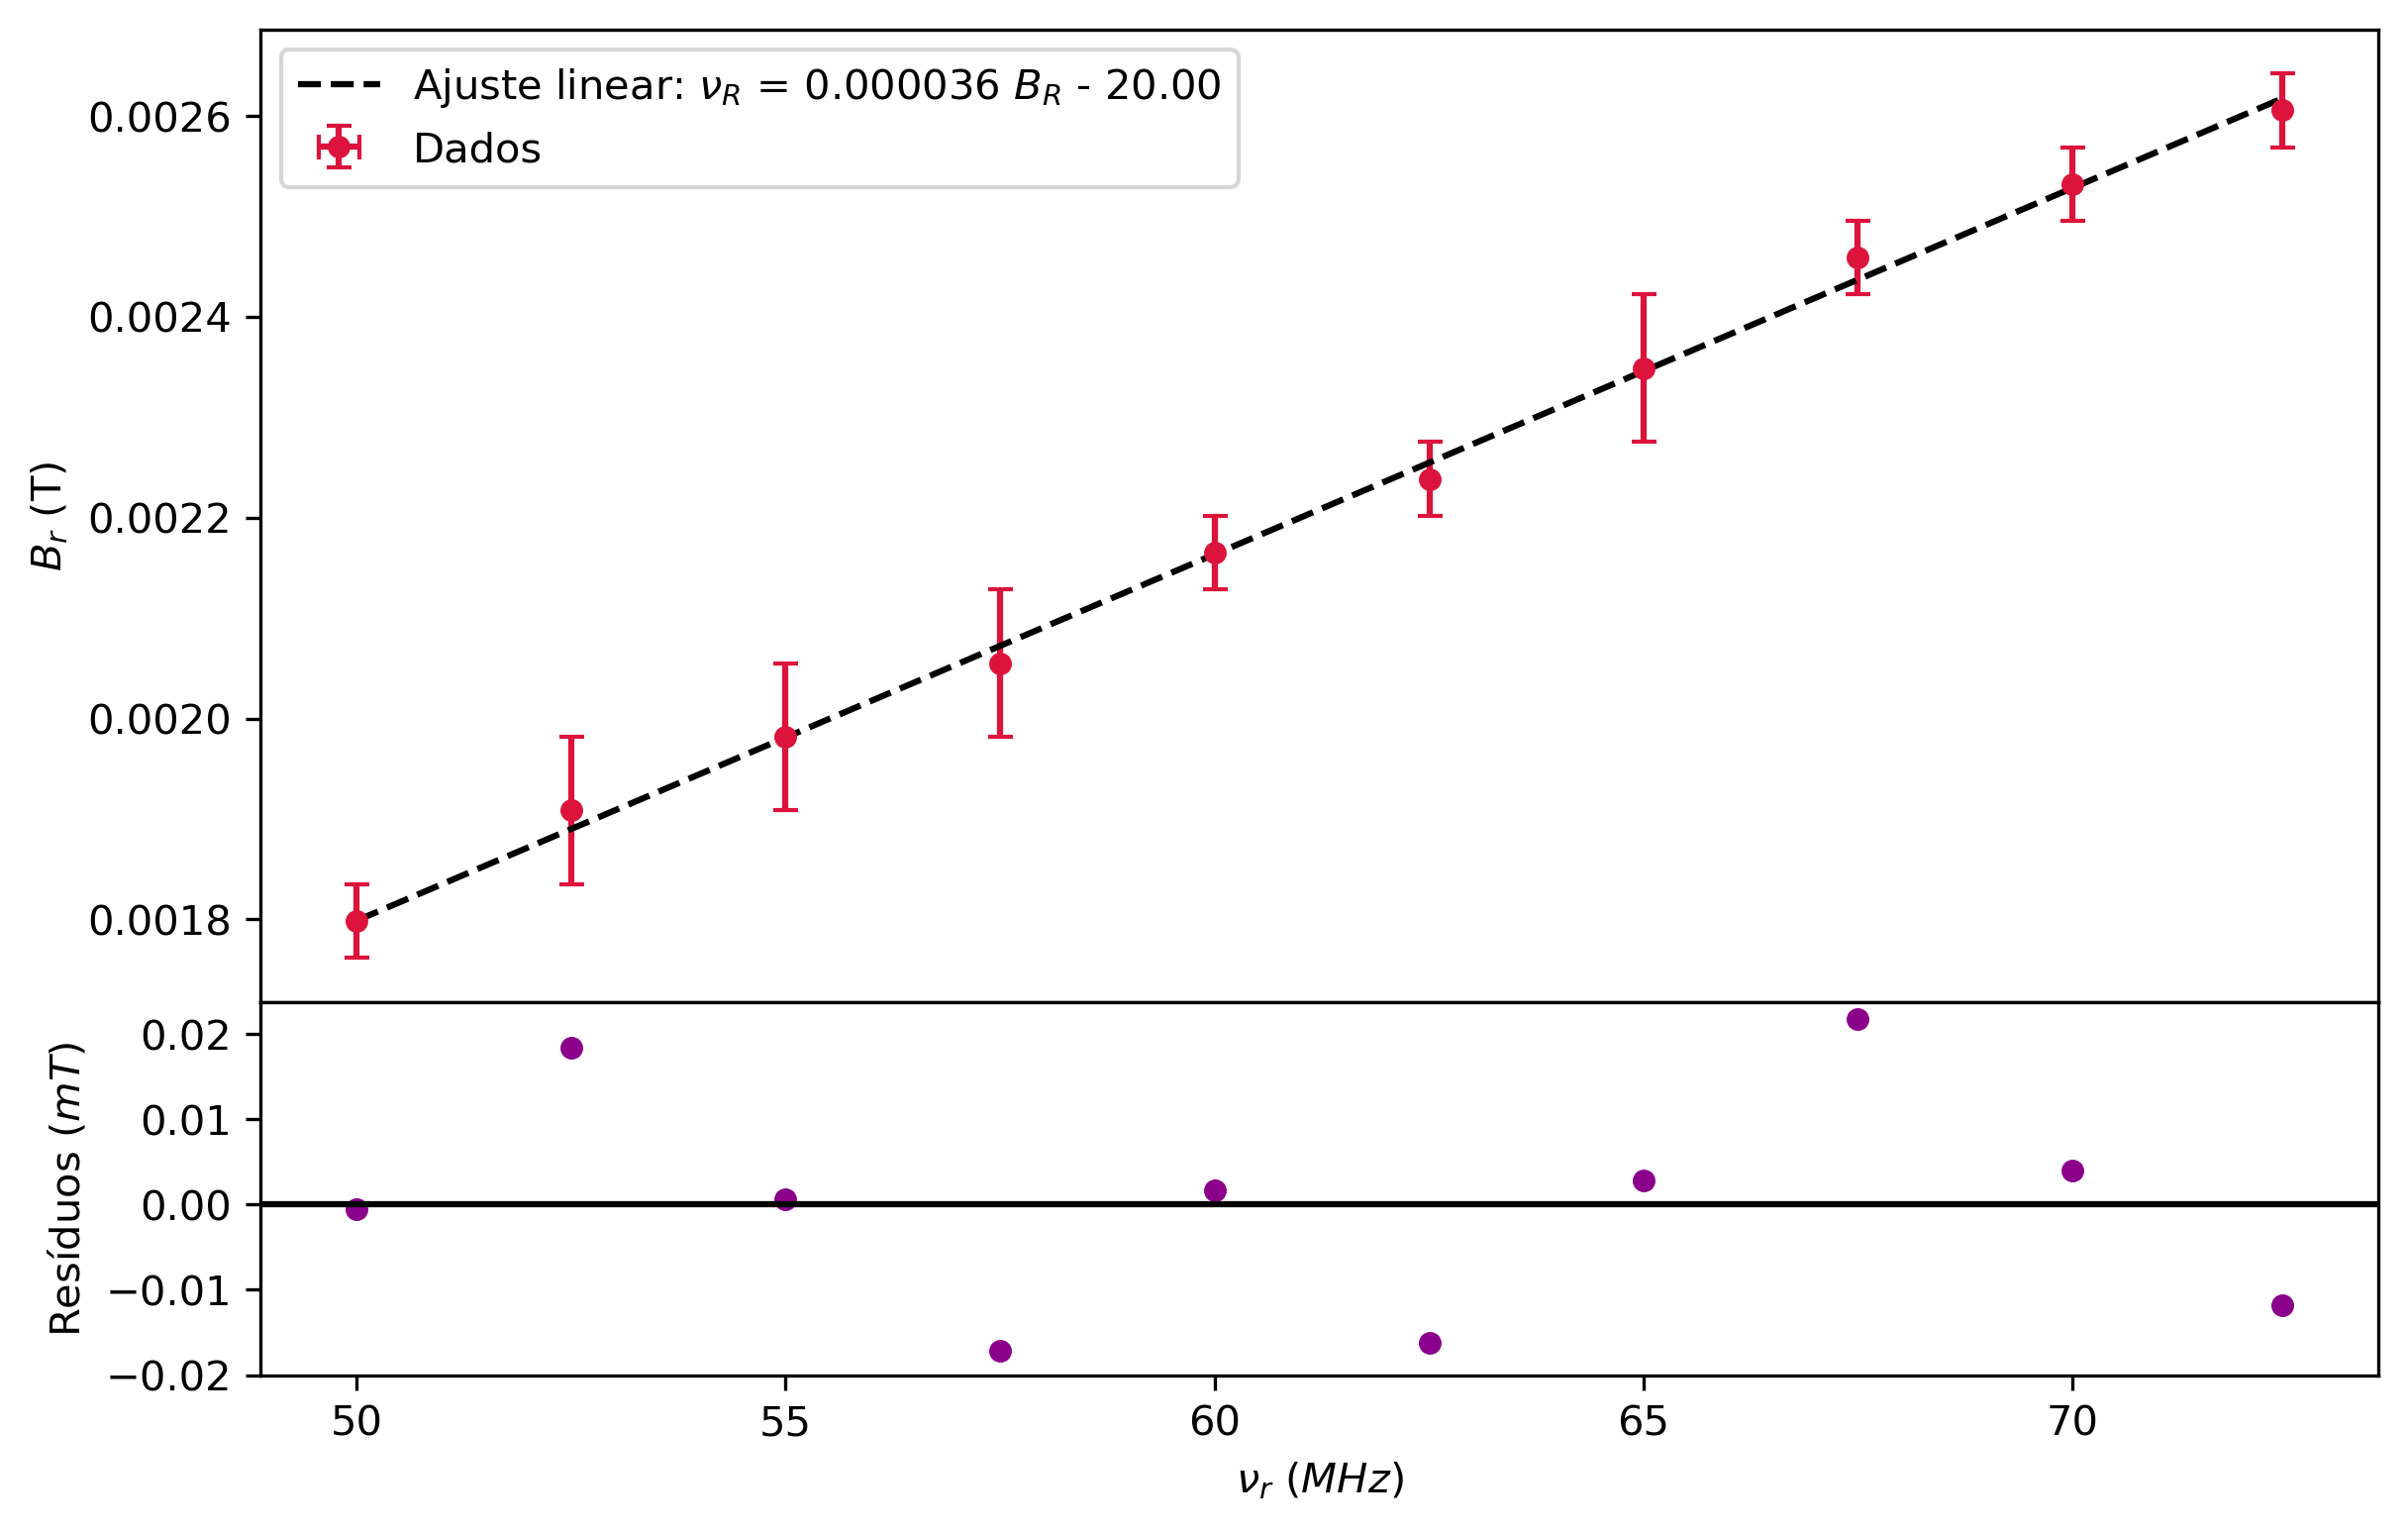

In [16]:
fig = plt.figure(figsize = [9.2,6], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[6, 2.3])
axs = gs.subplots(sharex=True)


#Gráfico principal
axs[0] = plt.subplot(gs[0])
axs[0].errorbar(f*1e-6,b_r, sigma_b_r,0, 'o', ms = 4.5, capsize=3, color = 'crimson', label = 'Dados')
axs[0].plot(f*1e-6,(f*coef_angular + coef_linear), color ='black', ls = '--',
         label = r'Ajuste linear: $\nu_R$ = %.6f $B_R$ - %.2f' % (coef_angular*1e6,abs(np.round(coef_linear*1e6,-1))))
axs[0].set_ylabel(r'$B_r$ (T)')
axs[0].legend()

#Gráfico de resíduos
axs[1] = plt.subplot(gs[1])
resid = (b_r - yhat)
axs[1].plot(f*1e-6, resid*1e3, 'o',ms = 4.5,  color = 'Darkmagenta', label = 'Residuos')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].set_ylabel(r"Resíduos ($mT$)")
axs[1].set_yticks(np.arange(-2,2.2,1.0)*1e-2)



plt.xlabel(r'$\nu_r$ ($MHz$)')
#plt.savefig('Graphs/ChargeMass/Ajuste_Residuos.pdf', dpi = 300)

plt.show()

## O fator de Landé

O modelo teórico para este experimento é:

$$B_R = \frac{h}{g\mu_B}\nu_R$$

Note que não temos um coeficiente linear, o que está de acordo com o que encontramos, uma vez que a incerteza encontrada é maior que o próprio valor. Deste modo podemos desprezar o coeficiente linear encontrado. Assim, devemos comparar diretamente os coeficientes angulares teórico e do ajuste:

$$c_a = \frac{h}{g\mu_B}$$
$$g =\frac{h}{c_a\mu_B}$$


A incerteza associada ao fator de Landé pode ser obtida através da propagação do erro do coeficiente angular:


$$\sigma_{g} = \sqrt{\left(\frac{\partial g}{\partial c_a}\right)^2\sigma_{c_a}}$$
$$\sigma_{g} = \sqrt{\left(\frac{\partial \frac{h}{c_a\mu_B}}{\partial c_a}\right)^2\sigma_{c_a}^2}$$
$$\sigma_{g} = \sqrt{\left( \frac{h}{c_a^2\mu_B}\right)^2\sigma_{c_a}^2}$$
$$\sigma_{g} = \frac{h}{c_a^2\mu_B}\sigma_{c_a}$$

In [8]:
mu_b = 9.28e-24 #J/T
h = 6.626e-34 #Js

g = h/(mu_b * coef_angular)

sigma_g = h/(mu_b * coef_angular**2) * sigma_angular
sigma_g = float('{:g}'.format(float('{:.1g}'.format(sigma_g))))

print('g = (%.3f +- %.3f)' %(g,sigma_g))

g = (1.958 +- 0.030)


In [18]:
print(abs(1 - 1.958/2))

0.02100000000000002
